In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from preprocess import *
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('datasets/train.csv')

In [3]:
display(data.head())
display(data.describe())
# display(data.dtypes)
display(data.isnull().sum())

# # display top 20 rows of the categorical columns
# display(data.select_dtypes(include='object').head(20))

# # count the number of unique values in each categorical column
# display(data.select_dtypes(include='object').nunique())

# # check to see if the bsmt values are always less than the regular values. They are not always less...
# data[['BsmtHalfBath', 'HalfBath']][data['BsmtHalfBath'] > data['HalfBath']]

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,64,65,60,RL,NaN,9375,Pave,NaN,Reg,Lvl,...,0,NaN,GdPrv,NaN,0,2,2009,WD,Normal,219500
1,651,652,70,RL,60.0,9084,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,10,2009,WD,Normal,108000
2,260,261,80,RL,120.0,19296,Pave,NaN,Reg,Lvl,...,0,NaN,GdWo,NaN,0,5,2009,WD,Normal,176000
3,1089,1090,120,FV,37.0,3316,Pave,Pave,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,197000
4,1112,1113,20,RL,73.0,7100,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,129900


,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1022.000000,1022.000000,1022.000000,842.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1015.000000,...,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000
mean,729.223092,730.223092,56.149706,70.261283,10306.330724,6.112524,5.564579,1971.557730,1984.930528,102.175369,...,93.991194,44.808219,20.854207,3.811155,15.141879,2.869863,29.015656,6.389432,2007.820939,181123.119374
std,428.530232,428.530232,41.215899,24.847801,9635.841640,1.404505,1.110557,29.823413,20.930978,179.987735,...,125.412155,62.973390,60.358181,31.177269,55.037574,41.479727,310.960859,2.728133,1.313022,81038.559207
min,0.000000,1.000000,20.000000,21.000000,1477.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,351.250000,352.250000,20.000000,60.000000,7500.000000,5.000000,5.000000,1953.000000,1966.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129125.000000
50%,740.000000,741.000000,50.000000,70.000000,9410.500000,6.000000,5.000000,1972.000000,1994.000000,0.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,165000.000000
75%,1099.750000,1100.750000,70.000000,80.000000,11433.250000,7.000000,6.000000,2001.000000,2004.000000,164.500000,...,168.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,1459.000000,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,736.000000,502.000000,552.000000,508.000000,396.000000,738.000000,8300.000000,12.000000,2010.000000,755000.000000


Unnamed: 0         0
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      180
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 82, dtype: int64

In [4]:
# ''' Create a heatmap from the correlation matrix '''

# # create a mask to ignore the upper part of the matrix
# mask = np.zeros_like(data.corr(), dtype=np.bool_)
# mask[np.triu_indices_from(mask)] = True

# # Set up the matplotlib figure
# plt.subplots(figsize=(15, 13))

# # create a color map
# color_map = sns.diverging_palette(220, 10, as_cmap=True)

# # display the heat map
# sns.heatmap(
#     data.corr(), 
#     mask=mask, 
#     cmap=color_map, 
#     vmax=1, 
#     center=0,
#     square=True, 
#     linewidths=.5, 
#     cbar_kws={"shrink": .7}
# )

test


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'HouseStyle',
       'OverallCond', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtUnfSF', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageArea',
       'GarageQual', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

<Axes: >

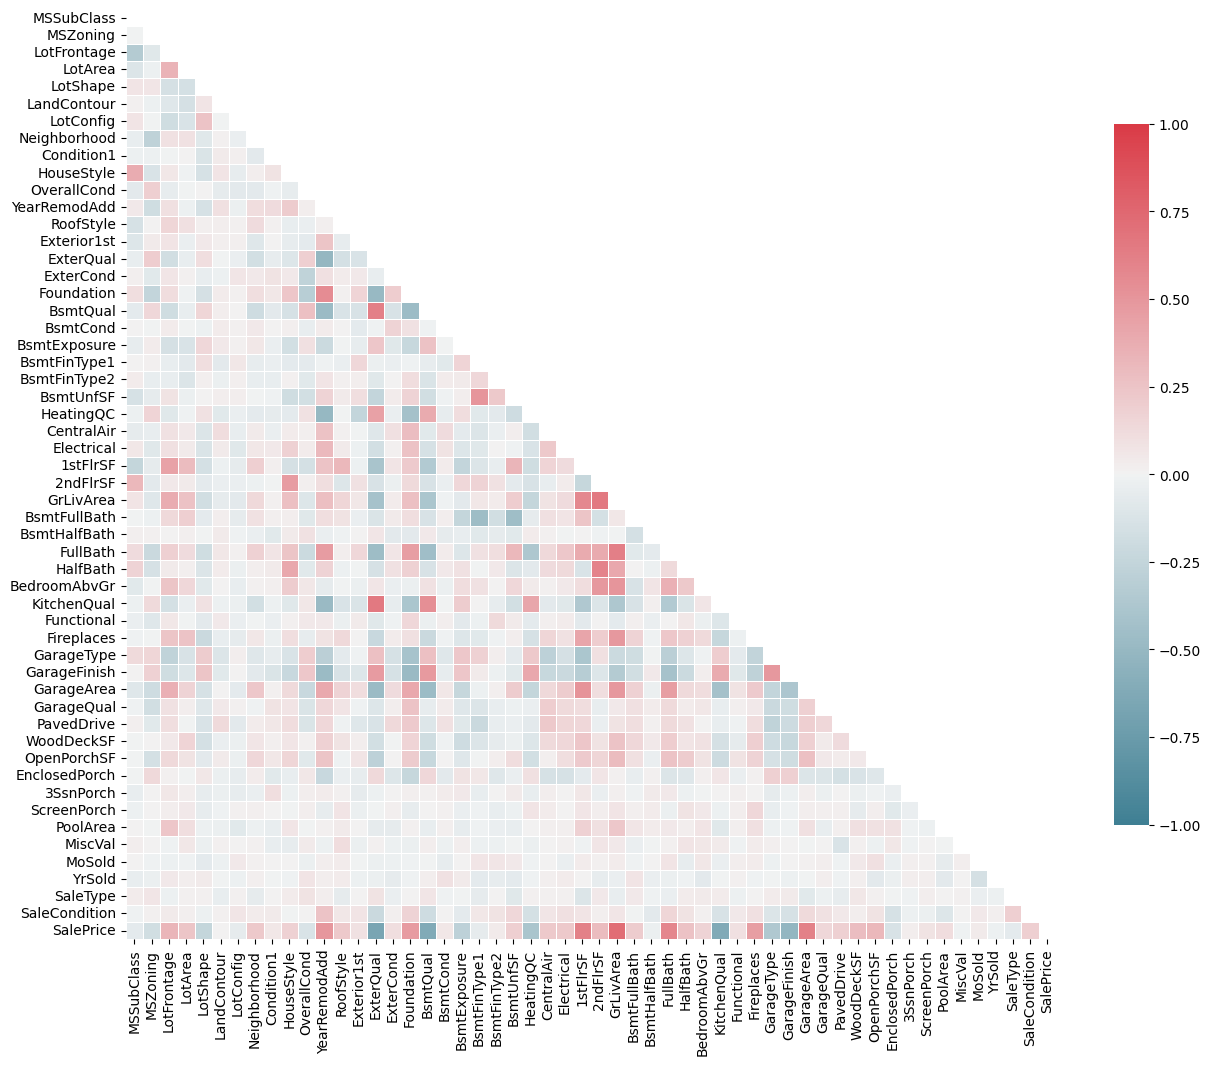

In [5]:
# Use feature selection to reduce feature count
training_data = reduce_features(data)

# handle remaining nans: remove/impute
training_data = handle_nans(training_data)

# convert categorical features to integers
label_encoders = create_label_encoders(training_data)
training_data = encode_categorical_features(training_data, label_encoders)
display(training_data.columns)

# create a mask to ignore the upper part of the matrix
mask = np.zeros_like(training_data.corr(), dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
plt.subplots(figsize=(15, 13))

# create a color map
color_map = sns.diverging_palette(220, 10, as_cmap=True)

# display the heat map
sns.heatmap(
    training_data.corr(), 
    mask=mask, 
    cmap=color_map, 
    vmin=-1,
    vmax=1, 
    center=0,
    square=True, 
    linewidths=.5, 
    cbar_kws={"shrink": .7}
)

In [6]:
for feature in training_data:
    cnts = training_data[feature].value_counts()
    if (cnts > 0).any():
        print(cnts, end='\n\n')

MSSubClass
20     351
60     203
50      99
120     63
80      46
70      40
30      39
160     37
90      17
190     13
85      12
75       9
45       5
180      4
40       3
Name: count, dtype: int64

MSZoning
3    750
4    128
1     47
2     10
0      6
Name: count, dtype: int64

LotFrontage
70.261283     170
60.000000      87
70.000000      48
80.000000      45
50.000000      37
             ... 
141.000000      1
106.000000      1
144.000000      1
109.000000      1
140.000000      1
Name: count, Length: 101, dtype: int64

LotArea
9600     19
7200     14
6000     12
8400     11
9000      8
         ..
8160      1
10728     1
11200     1
9520      1
8281      1
Name: count, Length: 735, dtype: int64

LotShape
3    583
0    322
1     28
2      8
Name: count, dtype: int64

LandContour
3    850
0     34
1     34
2     23
Name: count, dtype: int64

LotConfig
4    668
0    179
1     65
2     27
3      2
Name: count, dtype: int64

Neighborhood
11    145
4     105
16     65
20     64
15  